# Counterfeit Medicine Sales Prediction

**By:** Hedgar Ajakaiye, 
** September 2019 **

## Introduction

Counterfeit medicines are fake medicines which are either contaminated or contain wrong or no active ingredient. They could have the right active ingredient but at the wrong dose. Counterfeit drugs are illegal and are harmful to health. `10%` of the world's medicine is counterfeit and the problem is even worse in developing countries. Up to `30%` of medicines in developing countries are counterfeit.

Millions of pills, bottles and sachets of counterfeit and illegal medicines are being traded across the world. The World Health Organization (WHO) is working with International Criminal Police Organization (Interpol) to dislodge the criminal networks raking in billions of dollars from this cynical trade.

Despite all these efforts, counterfeit medicine selling rackets don’t seem to stop popping here and there. It has become a challenge to deploy resources to counter these; without spreading them too thin and eventually rendering them ineffective. Government has decided that they should focus on illegal operations of high networth first instead of trying to control all of them. In order to do that they have collected data which will help them to predict sales figures given an illegal operation's characteristics


## Formal Problem Statement

We would like to make example out a few of these counterfeiters but the challenge is what yardstick can we employ to determine the 'big fish(es)' that we can use as scape goat to send a strong message to these clandestine communities and equally serve as deterrent. After considering numerous features and attributes of these counterfeiters, we resolved to zero in on their sales figures. To this end we shall put to use the power of machine learning to scientifically predict current and future counterfeiters and stop them in their tracks for good!

We would train a model on  data we have collected secretly over the years on their operations. The data dictionary of the data is as follows:

| Variable                   |        Values                                                              |
|----------------------------|----------------------------------------------------------------------------|
|Medicine_ID                 |Alphanumeric identification number;Norminal Integer                         |
|Counterfeit_weight          |weighted percentage attached to each medicine;continuous                    |
|District_ID                 |District identification number; alphanumeric                                |
|Active since                |year monitoring started;Integer                                             |
|Medicine MRP                |Medicine price list;continuous                                              |  
|Medicine type               |the form of the medicine;categorical                                        |
|Side effect level           |the severity of the side effect associated with the medicine,categorical    |
|Availability rating         |the rate at which the medicine is available,continuous                      |
|Area type                   |the level of development of an area,                                        |
|Area city type              |the rating of the city;categorical                                          |
|Area district level         |the level of the area district;categorical                                  |
|Counterfeit sales           |value of sales,continuous                                                   |
                           
                           





## Load Library, Packages, Modules

In [344]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor 



In [345]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams.update({'font.size':25})

## Load Data

In [346]:
# change directory
# point to the directory that house the data
os.chdir('../data')

In [347]:
# read data into pandas
train_data = pd.read_csv('counterfeit_train.csv')
test_data = pd.read_csv('counterfeit_test.csv')

In [348]:
#shape of test and train data
train_data.shape, test_data.shape

((6818, 12), (1705, 11))

In [349]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [350]:
# combine test and train data to ensure uniform preprocessing
# to combine test and train data successfully, the value of the columns of test and train data must equal
test_data['Counterfeit_Sales'] =np.nan
test_data['data'] = 'test'
train_data['data'] = 'train'
test_data = test_data[train_data.columns]
all_data = pd.concat([test_data, train_data], axis=0)



In [351]:
all_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [352]:
#check the dimension
all_data.shape

(8523, 13)

In [353]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 6817
Data columns (total 13 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     7060 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [354]:
#make the column names uniform
def clean_colname(name):
    name = name.strip().lower()
    return name
all_data = all_data.rename(columns= clean_colname)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,active_since,medicine_mrp,medicine_type,sideffect_level,availability_rating,area_type,area_city_type,area_dist_level,counterfeit_sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [355]:
#check and treat missing value. This value should exlude the counterfeit sale column as the na there is intentional
all_data.isnull().mean() * 100

medicine_id             0.000000
counterfeit_weight     17.165317
distarea_id             0.000000
active_since            0.000000
medicine_mrp            0.000000
medicine_type           0.000000
sideffect_level         0.000000
availability_rating     0.000000
area_type               0.000000
area_city_type          0.000000
area_dist_level         0.000000
counterfeit_sales      20.004693
data                    0.000000
dtype: float64

In [356]:
# fill missing values in counterfeit_weight columns with the mean weight
# the counterfeit_weight column portion of the training data set and not the combined portion shall be used to calculate the mean
# all_data['counterfeit_weight'].mean() # 14.158
# all_data['counterfeit_weight'].fillna(14.158, inplace = True)
# print('current number of missing value ', all_data['counterfeit_weight'].isnull().sum())
filt = all_data['data'] == 'train'
all_data.loc[filt, 'counterfeit_weight'].mean() # 14.115
all_data['counterfeit_weight'].fillna(14.115, inplace= True)
print('Total number of missing values after treatment:', all_data['counterfeit_weight'].isnull().sum())




Total number of missing values after treatment: 0


In [357]:
# display descriptive stats
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,8523.0,14.150325,4.226154,5.855,10.610000,14.115000,17.300000,22.650000
active_since,8523.0,1995.831867,8.371760,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
medicine_mrp,8523.0,151.292782,62.275067,41.590,104.126500,153.312800,195.943700,277.188400
availability_rating,8523.0,0.079132,0.051598,0.013,0.039989,0.066931,0.107585,0.341391
counterfeit_sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [358]:
# columns with float type
all_data.select_dtypes(include=['float64']).columns

Index(['counterfeit_weight', 'medicine_mrp', 'availability_rating',
       'counterfeit_sales'],
      dtype='object')

In [359]:
#column with integer data type
all_data.select_dtypes(include=['int64']).columns

Index(['active_since'], dtype='object')

In [360]:
#columns with categorical type. This does not include the 'data' which serves the purpose of a separator
all_data.select_dtypes(include=['object']).columns

Index(['medicine_id', 'distarea_id', 'medicine_type', 'sideffect_level',
       'area_type', 'area_city_type', 'area_dist_level', 'data'],
      dtype='object')

## Data Exploration

#### How many unique medicine type are present?

In [361]:
# Number of unique medicine type
train_data['Medicine_Type'].nunique()

16

#### which area type has the highest counterfeit drug?
Down Town, Area has the highest number of counterfeited drugs and medicine

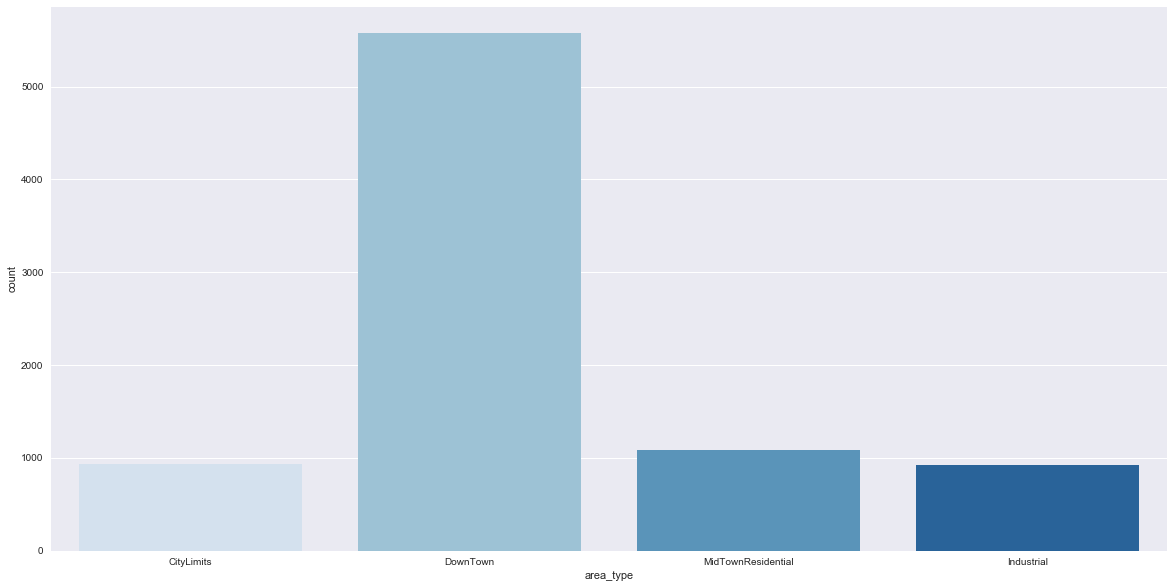

In [362]:
#which area type has the highest counterfeit drug

# train_data['Area_Type'].value_counts().plot(kind = 'bar')
# plt.xlabel('Area Type')
# plt.ylabel('count')
# plt.title('Counterfeit Drug Area Type Count');
sns.countplot(x ='area_type', data=all_data, palette='Blues');

### Which medicine type has the lowest count and their respective level of side effects?
Antiviral appears to be the least counterfeited medicine whereas Antibiotics are the third most counterfeited drug but with the most critical side effect level

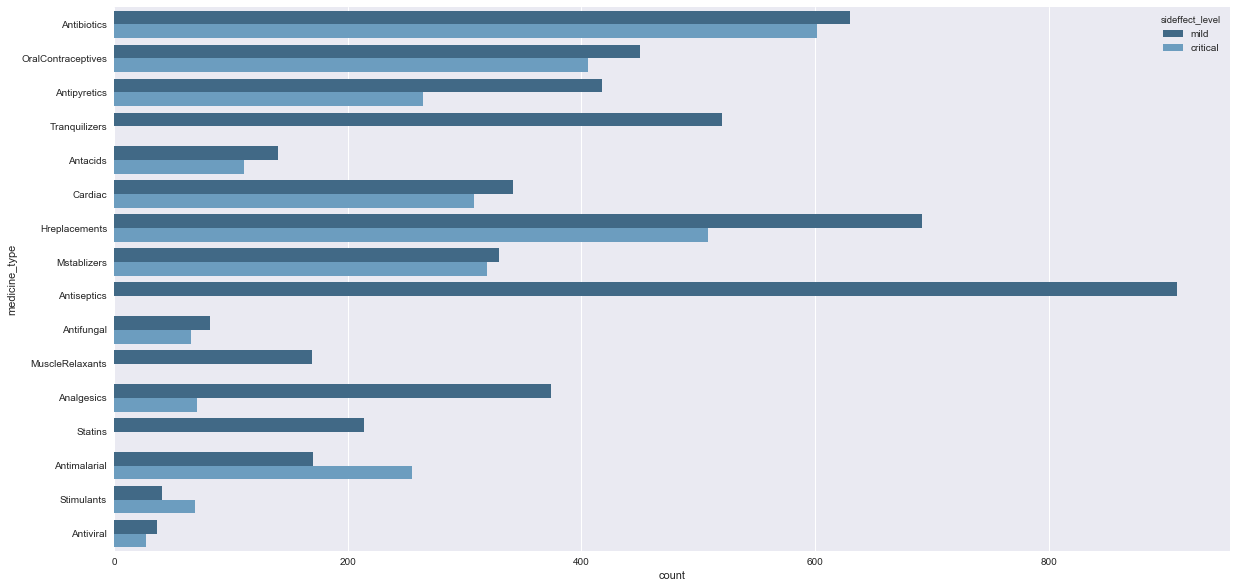

In [363]:
#which medicine type has the lowest count
#train_data['Medicine_Type'].value_counts(ascending=True)
sns.countplot(y='medicine_type', hue='sideffect_level', data=all_data, palette='Blues_d');

### What is the average sales figure of counterfeited medicine by medicine type
The Antiviral appears to command the highest average sales


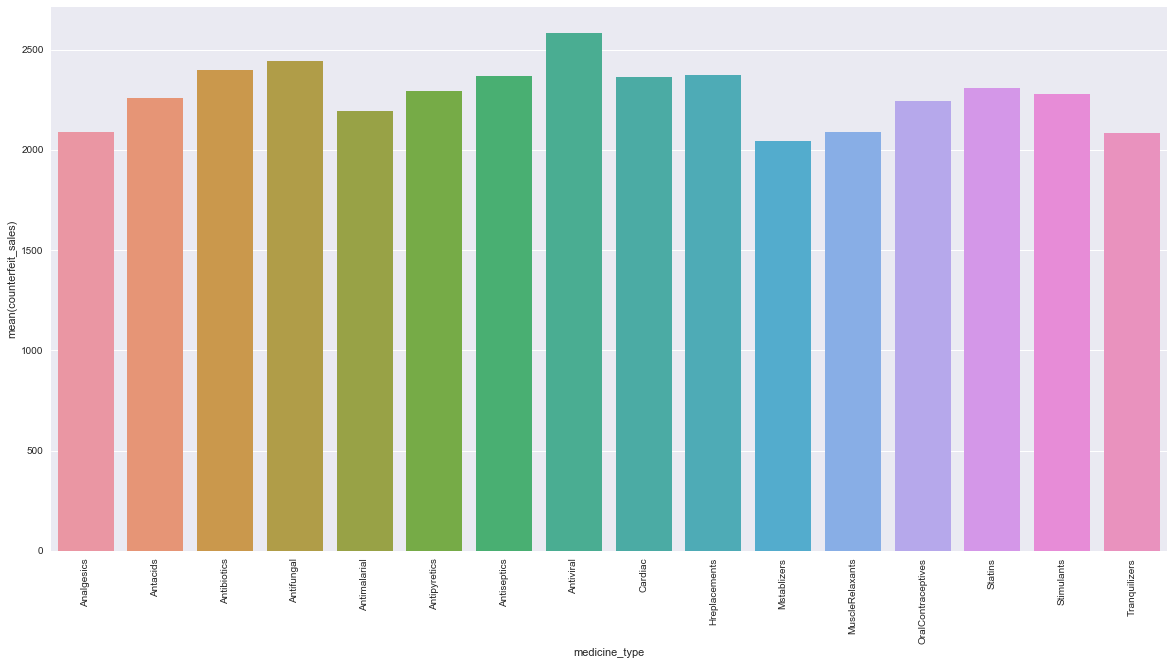

In [364]:
#average sales figure of counterfeited drugs 
filt = all_data['data'] == 'train'
adj_dat = all_data.loc[filt]
avg_sales = adj_dat.groupby('medicine_type').agg({'counterfeit_sales':'mean'}).reset_index()
sns.barplot(x = 'medicine_type', y='counterfeit_sales', data=avg_sales)
plt.xticks(rotation=90);


In [365]:
all_data.columns

Index(['medicine_id', 'counterfeit_weight', 'distarea_id', 'active_since',
       'medicine_mrp', 'medicine_type', 'sideffect_level',
       'availability_rating', 'area_type', 'area_city_type', 'area_dist_level',
       'counterfeit_sales', 'data'],
      dtype='object')

### Data Preprocessing:Feature Engineering

In [366]:
# determine the period from the year since active till date
all_data['period_active'] =  2019 - all_data['active_since']

all_data = all_data.drop('active_since',1)
print('The number of columns after dropping the active_since column:',all_data.shape[1])


The number of columns after dropping the active_since column: 13


In [367]:
#check frequency of column
all_data['medicine_type'].value_counts()


Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: medicine_type, dtype: int64

#### Treatment/transformation  of  categorical variable

In [368]:
# get dummy and drop Antiviral medicine for low frequency
medtypedummy = all_data['medicine_type'].str.get_dummies()


In [369]:
#add to the data frame accordingly
all_data = pd.concat([all_data, medtypedummy],1)
all_data = all_data.drop(['Antiviral','medicine_type'], 1)

In [370]:
all_data['area_type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: area_type, dtype: int64

In [371]:
#create dummy of area_type
areatype_dummy = all_data['area_type'].str.get_dummies()


In [372]:
#drop industrial area type and add other area to data frame
all_data = pd.concat([all_data, areatype_dummy],1)
all_data = all_data.drop(['area_type', 'Industrial'],1)

In [373]:
pd.set_option('display.max_columns', 50)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,medicine_mrp,sideffect_level,availability_rating,area_city_type,area_dist_level,counterfeit_sales,data,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential
0,HLZ81,14.115,Area027,85.5328,mild,0.112747,Tier 3,Medium,NaN,test,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,ECE94,13.450,Area045,257.1460,mild,0.144446,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,SAD14,7.100,Area045,98.1172,mild,0.144221,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,EQV63,18.300,Area010,135.3730,mild,0.100388,Tier 3,Unknown,NaN,test,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,AIR10,14.115,Area019,112.8016,mild,0.022585,Tier 1,Small,NaN,test,36,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [374]:
#create dummy for sideffect level columns of data frame
all_data['sideffect_level'].value_counts()

mild        5517
critical    3006
Name: sideffect_level, dtype: int64

In [375]:
#create dummy of sideffect column
all_data['sideffect_mc'] = np.where(all_data['sideffect_level'] == 'mild',1,0)
all_data = all_data.drop(['sideffect_level'], 1)

In [376]:
all_data['area_city_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: area_city_type, dtype: int64

In [377]:
#create dummy for area city type
actype_dummy = all_data['area_city_type'].str.get_dummies()


In [378]:
#concat dummy with data frame and drop Tier one
all_data = pd.concat([all_data, actype_dummy],1)
all_data = all_data.drop(['Tier 1','area_city_type'], 1)

In [379]:
all_data['distarea_id'].value_counts()

Area027    935
Area013    932
Area046    930
Area049    930
Area035    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: distarea_id, dtype: int64

In [380]:
# create dumy for district area id drop area019 and concatenate with data frame accordingly
distarea_dummy =  all_data['distarea_id'].str.get_dummies()


In [381]:
all_data = pd.concat([all_data, distarea_dummy],1)
all_data = all_data.drop(['Area019', 'distarea_id'],1)

In [382]:
all_data['area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: area_dist_level, dtype: int64

In [383]:
#create dummy of area distance level
ad_leve_dummy = all_data['area_dist_level'].str.get_dummies()


In [384]:
#concatenate dummy with data frame and drop high area distance
all_data = pd.concat([all_data, ad_leve_dummy],1)
all_data = all_data.drop(['High', 'area_dist_level'],1)

In [386]:
#dimemsion of combined data
all_data.shape

(8523, 40)